# Intent Classification with Threshold
- compute accuracy score
- compute precision score
- compute recall score
- plot accuracy computed by different thresholds
- plot precision and recall computed by different thresholds

## 1. Prepare testing dataset and corresponding labels

In [1]:
utterances = [
    "I like to drink coffee.",
    "Watching TV is a boring activity.",
    "It is interesting to follow the Tweet of President Trump.",
    "BLA BLA BLA !!!",
    "Hello World",
]
labels_intent = [
    "preference",
    "hate",
    "preference",
    "nothing",
    "nothing",
]

## 2. Summon your model and Obtain predictions

In [ ]:
from ynlu import NLUClient
client = NLUClient(token="YOUR_TOKEN_HERE")

# Summon your model
model = client.get_model_by_id("MODEL_ID")

# Predict
predictions = []
for utt in utterances:
    intent_prediction, _ = model.predict(utt)
    predictions.append(intent_prediction)

In [2]:
## Suppose the predictions you obtain are:
predictions = [
    [
        {"intent": "nothing", "score": 0.7}, 
        {"intent": "preference", "score": 0.2}, 
        {"intent": "hate", "score": 0.1},
    ],
    [
        {"intent": "hate", "score": 0.9}, 
        {"intent": "nothing", "score": 0.08}, 
        {"intent": "preference", "score": 0.02},
    ],
    [
        {"intent": "preference", "score": 0.8}, 
        {"intent": "nothing", "score": 0.18}, 
        {"intent": "hate", "score": 0.02},
    ],
    [
        {"intent": "preference", "score": 0.4}, 
        {"intent": "hate", "score": 0.32}, 
        {"intent": "nothing", "score": 0.28},
    ],
    [
        {"intent": "nothing", "score": 0.67777}, 
        {"intent": "preference", "score": 0.2}, 
        {"intent": "hate", "score": 0.1299999},
    ],
]

## 3. Evaluate your model by computing different scores  

### (1) accuracy score with threshold

In [3]:
from ynlu.sdk.evaluation import intent_accuracy_score_with_threshold
accuracy = intent_accuracy_score_with_threshold(
    intent_predictions=predictions,
    y_trues=labels_intent,
    threshold=0.6,
)
print("accuracy with threshold {} = {}".format(0.6, accuracy))

accuracy with threshold 0.6 = 0.6


### (2) precision score with threshold

In [4]:
from ynlu.sdk.evaluation import intent_precision_score_with_threshold
precision = intent_precision_score_with_threshold(
    intent_predictions=predictions,
    y_trues=labels_intent,
    threshold=0.6,
)
print("precision with threshold {} = {}".format(0.6, precision))

precision with threshold 0.6 = 0.8


### (3) recall score with threshold

In [5]:
from ynlu.sdk.evaluation import intent_recall_score_with_threshold
recall = intent_recall_score_with_threshold(
    intent_predictions=predictions,
    y_trues=labels_intent,
    threshold=0.6,
)
print("recall with threshold {} = {}".format(0.6, recall))

recall with threshold 0.6 = 0.6


## 4. Plot 

### (1) compute accuracy by different thresholds

In [9]:
import numpy as np

from ynlu.sdk.evaluation import intent_accuracy_score_with_threshold


thresholds = []
accuracy_scores = []
for threshold in np.linspace(0, 1, 20, endpoint=False):
    accuracy = intent_accuracy_score_with_threshold(
        intent_predictions=predictions,
        y_trues=labels_intent,
        threshold=threshold,
    )
    print("accuracy with threshold {} = {}".format(threshold, accuracy))
    thresholds.append(threshold)
    accuracy_scores.append(accuracy)

accuracy with threshold 0.0 = 0.6
accuracy with threshold 0.05 = 0.6
accuracy with threshold 0.1 = 0.6
accuracy with threshold 0.15000000000000002 = 0.6
accuracy with threshold 0.2 = 0.6
accuracy with threshold 0.25 = 0.6
accuracy with threshold 0.30000000000000004 = 0.6
accuracy with threshold 0.35000000000000003 = 0.6
accuracy with threshold 0.4 = 0.6
accuracy with threshold 0.45 = 0.6
accuracy with threshold 0.5 = 0.6
accuracy with threshold 0.55 = 0.6
accuracy with threshold 0.6000000000000001 = 0.6
accuracy with threshold 0.65 = 0.6
accuracy with threshold 0.7000000000000001 = 0.4
accuracy with threshold 0.75 = 0.4
accuracy with threshold 0.8 = 0.2
accuracy with threshold 0.8500000000000001 = 0.2
accuracy with threshold 0.9 = 0.0
accuracy with threshold 0.9500000000000001 = 0.0


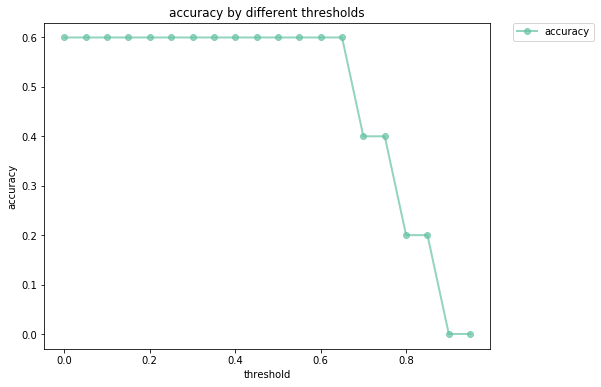

In [24]:
%matplotlib inline
from ynlu.sdk.evaluation.plot import plot_lines


plot_lines(
    data=[{"x": thresholds, "y": accuracy_scores, "label": "accuracy"}],
    x_axis_name="threshold",
    y_axis_name="accuracy",
    title="accuracy by different thresholds",
)

### (2) compute precision and recall by different thresholds and plot

In [26]:
import numpy as np

from ynlu.sdk.evaluation import (
    intent_precision_score_with_threshold,
    intent_recall_score_with_threshold,
)


thresholds = []
precision_scores = []
recall_scores = []
for threshold in np.linspace(0, 1, 20, endpoint=False):
    precision = intent_precision_score_with_threshold(
        intent_predictions=predictions,
        y_trues=labels_intent,
        threshold=threshold,
    )
    recall = intent_recall_score_with_threshold(
        intent_predictions=predictions,
        y_trues=labels_intent,
        threshold=threshold,
    )
    print("At threshold {}: (precision = {}, recall = {})".format(threshold, precision, recall))
    thresholds.append(threshold)
    precision_scores.append(precision)
    recall_scores.append(recall)

At threshold 0.0: (precision = 0.6, recall = 0.6)
At threshold 0.05: (precision = 0.6, recall = 0.6)
At threshold 0.1: (precision = 0.6, recall = 0.6)
At threshold 0.15000000000000002: (precision = 0.6, recall = 0.6)
At threshold 0.2: (precision = 0.6, recall = 0.6)
At threshold 0.25: (precision = 0.6, recall = 0.6)
At threshold 0.30000000000000004: (precision = 0.6, recall = 0.6)
At threshold 0.35000000000000003: (precision = 0.6, recall = 0.6)
At threshold 0.4: (precision = 0.8, recall = 0.6)
At threshold 0.45: (precision = 0.8, recall = 0.6)
At threshold 0.5: (precision = 0.8, recall = 0.6)
At threshold 0.55: (precision = 0.8, recall = 0.6)
At threshold 0.6000000000000001: (precision = 0.8, recall = 0.6)
At threshold 0.65: (precision = 0.8, recall = 0.6)
At threshold 0.7000000000000001: (precision = 0.6, recall = 0.4)
At threshold 0.75: (precision = 0.6, recall = 0.4)
At threshold 0.8: (precision = 0.2, recall = 0.2)
At threshold 0.8500000000000001: (precision = 0.2, recall = 0.2)
A

/home/en/.pyenv/versions/py3_nlu_sdk/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


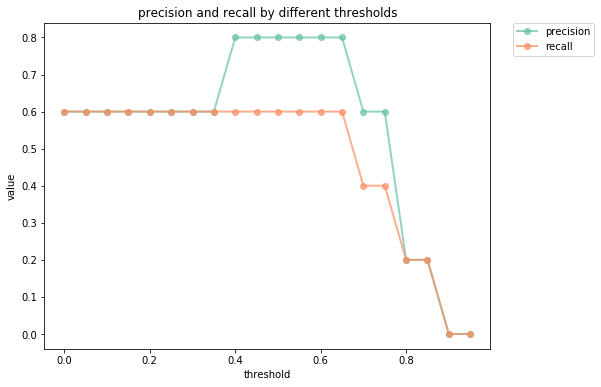

In [27]:
%matplotlib inline
from ynlu.sdk.evaluation.plot import plot_lines


plot_lines(
    data=[
        {"x": thresholds, "y": precision_scores, "label": "precision"},
        {"x": thresholds, "y": recall_scores, "label": "recall"},
    ],
    x_axis_name="threshold",
    y_axis_name="value",
    title="precision and recall by different thresholds",
)